# Exploratory Data Analysis and Cleaning of Wine Quality Dataset

**Objective:** This notebook performs data cleaning and exploratory data analysis (EDA) on two wine datasets (red and white). We'll merge them, handle missing values, analyze distributions, detect outliers, and visualize relationships among key features to understand the data better.

---

## Importing Required Libraries

We'll begin by importing essential libraries for data manipulation and visualization:
- **`pandas`** for data handling
- **`matplotlib`** and **`seaborn`** for visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

## Loading Datasets
We have two datasets: one for red wine and one for white wine. These datasets contain chemical properties of wine and their respective quality scores.

- **Red wine dataset**: `winequality-red.csv`
- **White wine dataset**: `winequality-white.csv`

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
display(red_wine)
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Merging Datasets
To perform a unified analysis, let's merge both datasets into a single dataset and add a new column `wine_type` to distinguish red from white wine:
- `wine_type` = 0: Red wine
- `wine_type` = 1: White wine

In [3]:
red_wine['wine_type'] = 0
white_wine['wine_type'] = 1
data = pd.concat([red_wine, white_wine], ignore_index=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Initial Data Overview

Let's take a look at the structure of the merged data, check for missing values, and understand the overall data shape and types.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

## Data Cleaning - Removing Duplicates
We'll drop any duplicate rows to ensure the dataset contains unique observations. This helps in preventing data skewness and ensuring accurate analysis.

In [6]:
data.drop_duplicates(inplace=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Distribution of Wine Quality Ratings
Let's look at the distribution of the `quality` column, which represents wine quality scores. This will help us categorize wines into quality classes and observe any class imbalances.

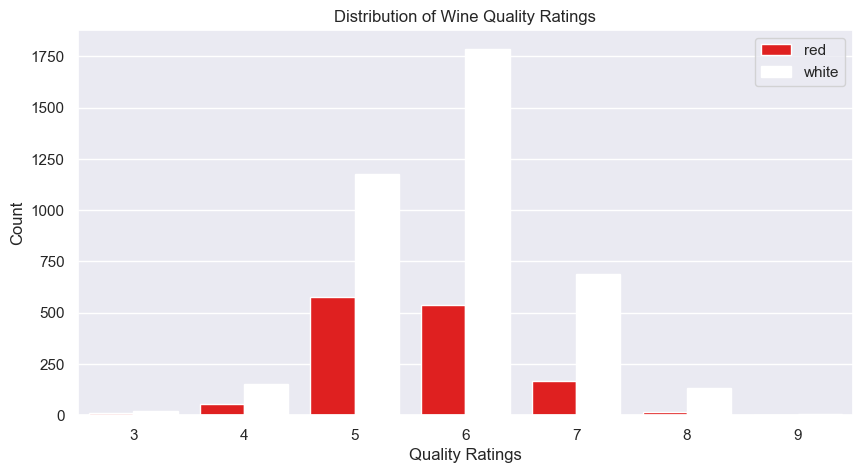

In [7]:

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='quality', palette=['red','white'],hue='wine_type')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Ratings')
plt.ylabel('Count')
plt.legend(['red', 'white'])
plt.xticks(rotation=0)
plt.show()

### Distribution of Wine Quality Ratings
This plot illustrates the distribution of quality ratings across red and white wines.

**Insights:**
- Most wines are rated between 5 and 7, with fewer wines rated below or above this range.
- Red wines tend to have more concentrated ratings around 5 and 6, while white wines show a broader distribution with a slight peak around rating 6.
- This indicates a potential focus on methods to increase ratings for lower-rated wines.

---

## Imbalance Handling

Due to significant imbalance in wine quality categories, we will later apply techniques like oversampling or class weighting during model training.

In [8]:
from imblearn.over_sampling import SMOTE

x = data.drop(['quality'],axis=1)
y= data['quality']

smote = SMOTE(random_state=42, k_neighbors=1)
x_sampled , y_sampled = smote.fit_resample(x,y)
data_sampled = pd.DataFrame(x_sampled, columns=x.columns)
data = pd.concat([data_sampled,y_sampled],axis=1)
data.quality.value_counts()

5    2323
6    2323
7    2323
4    2323
8    2323
3    2323
9    2323
Name: quality, dtype: int64

## Handling Outliers

In [9]:
def Outlier_r(columns,df):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lowerbound = Q1 - (1.5 * IQR)
        upperbound = Q3 + (1.5 * IQR)
        df = df[(df[col] >= lowerbound) & (df[col] <= upperbound)]
    return df
display(data.shape)
data = Outlier_r(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates', 'alcohol',],data)
data.shape

(16261, 13)

(10519, 13)

### Grouping Quality Ratings into Categories
Since there are limited unique quality values, we group them into three main categories:

- **Low quality**: 3-5
- **Medium quality**: 6-7
- **High quality**: 8-9

In [10]:
data.quality.value_counts()

9    2323
8    1802
7    1692
6    1428
4    1334
5    1172
3     768
Name: quality, dtype: int64

In [11]:
keys = {'low':0, 'medium':1, 'high':2}
data['quality'] = pd.cut(data['quality'], bins=[0, 5, 7, 10], labels=keys.values(), include_lowest=True).astype(int)
data.quality.value_counts()

2    4125
0    3274
1    3120
Name: quality, dtype: int64

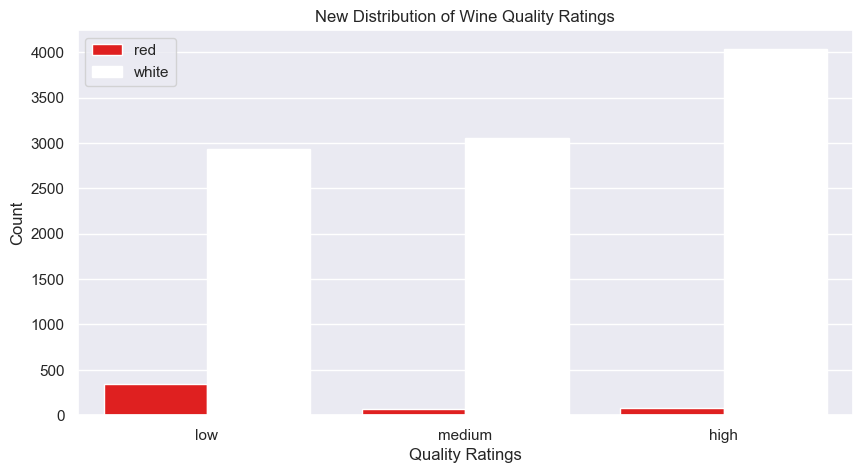

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='quality', palette=['red','white'],hue='wine_type')
plt.title('New Distribution of Wine Quality Ratings')
plt.xlabel('Quality Ratings')
plt.ylabel('Count')
plt.xticks([0,1,2],['low','medium','high'])
plt.legend(['red', 'white'])
plt.xticks(rotation=0)
plt.show()

## Correlation Analysis

Let's examine the correlation among features using a heatmap. Highly correlated features can influence our analysis and model building later.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10519 entries, 5 to 16260
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         10519 non-null  float64
 1   volatile acidity      10519 non-null  float64
 2   citric acid           10519 non-null  float64
 3   residual sugar        10519 non-null  float64
 4   chlorides             10519 non-null  float64
 5   free sulfur dioxide   10519 non-null  float64
 6   total sulfur dioxide  10519 non-null  float64
 7   density               10519 non-null  float64
 8   pH                    10519 non-null  float64
 9   sulphates             10519 non-null  float64
 10  alcohol               10519 non-null  float64
 11  wine_type             10519 non-null  int64  
 12  quality               10519 non-null  int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 1.1 MB


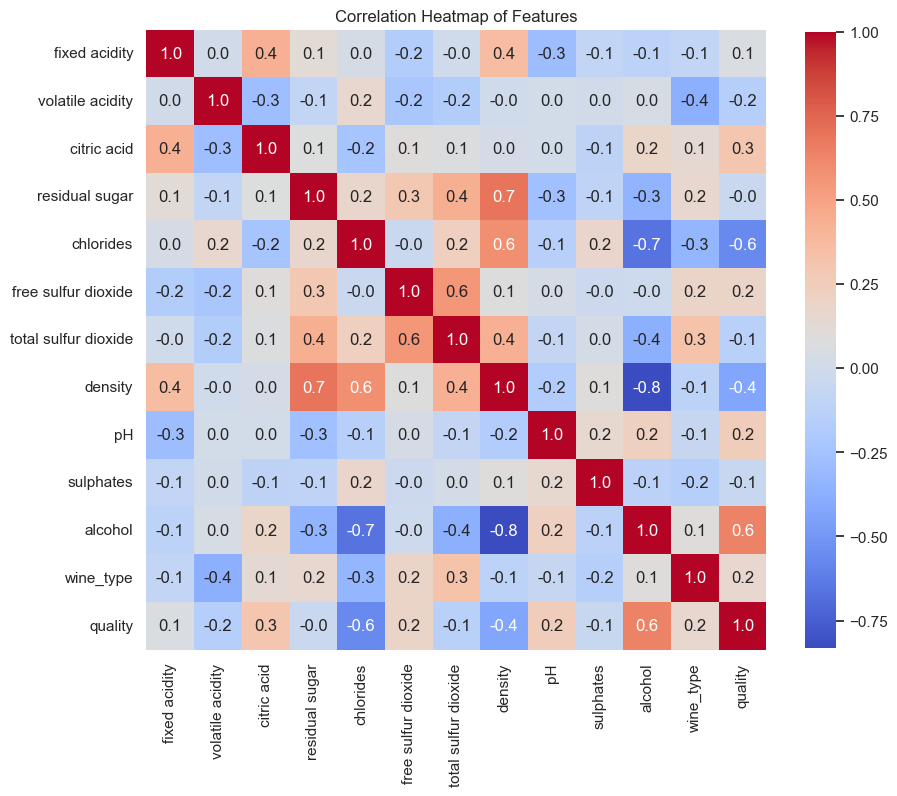

In [14]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Features')
plt.show()

### Correlation Heatmap for Chemical Properties and Quality
This heatmap displays the correlation between various chemical properties and wine quality.

**Insights:**
- **Alcohol content** has a positive correlation with quality, especially in white wines, suggesting that higher alcohol content may relate to higher quality.
- **Volatile acidity** shows a negative correlation with quality, particularly in red wines, indicating that higher acidity may reduce perceived quality.
- **Residual sugar**, **total sulphur dioxide**, **sulphates**, **Residual sugar** and **pH** have weaker correlations with quality, hinting that other factors might play a more significant role in determining wine quality.

---

## Continuous Feature Distribution by Quality

We visualize the distribution of continuous features by quality ratings to understand how different features vary across wine qualities. This helps us identify potential features that could be used to predict quality.

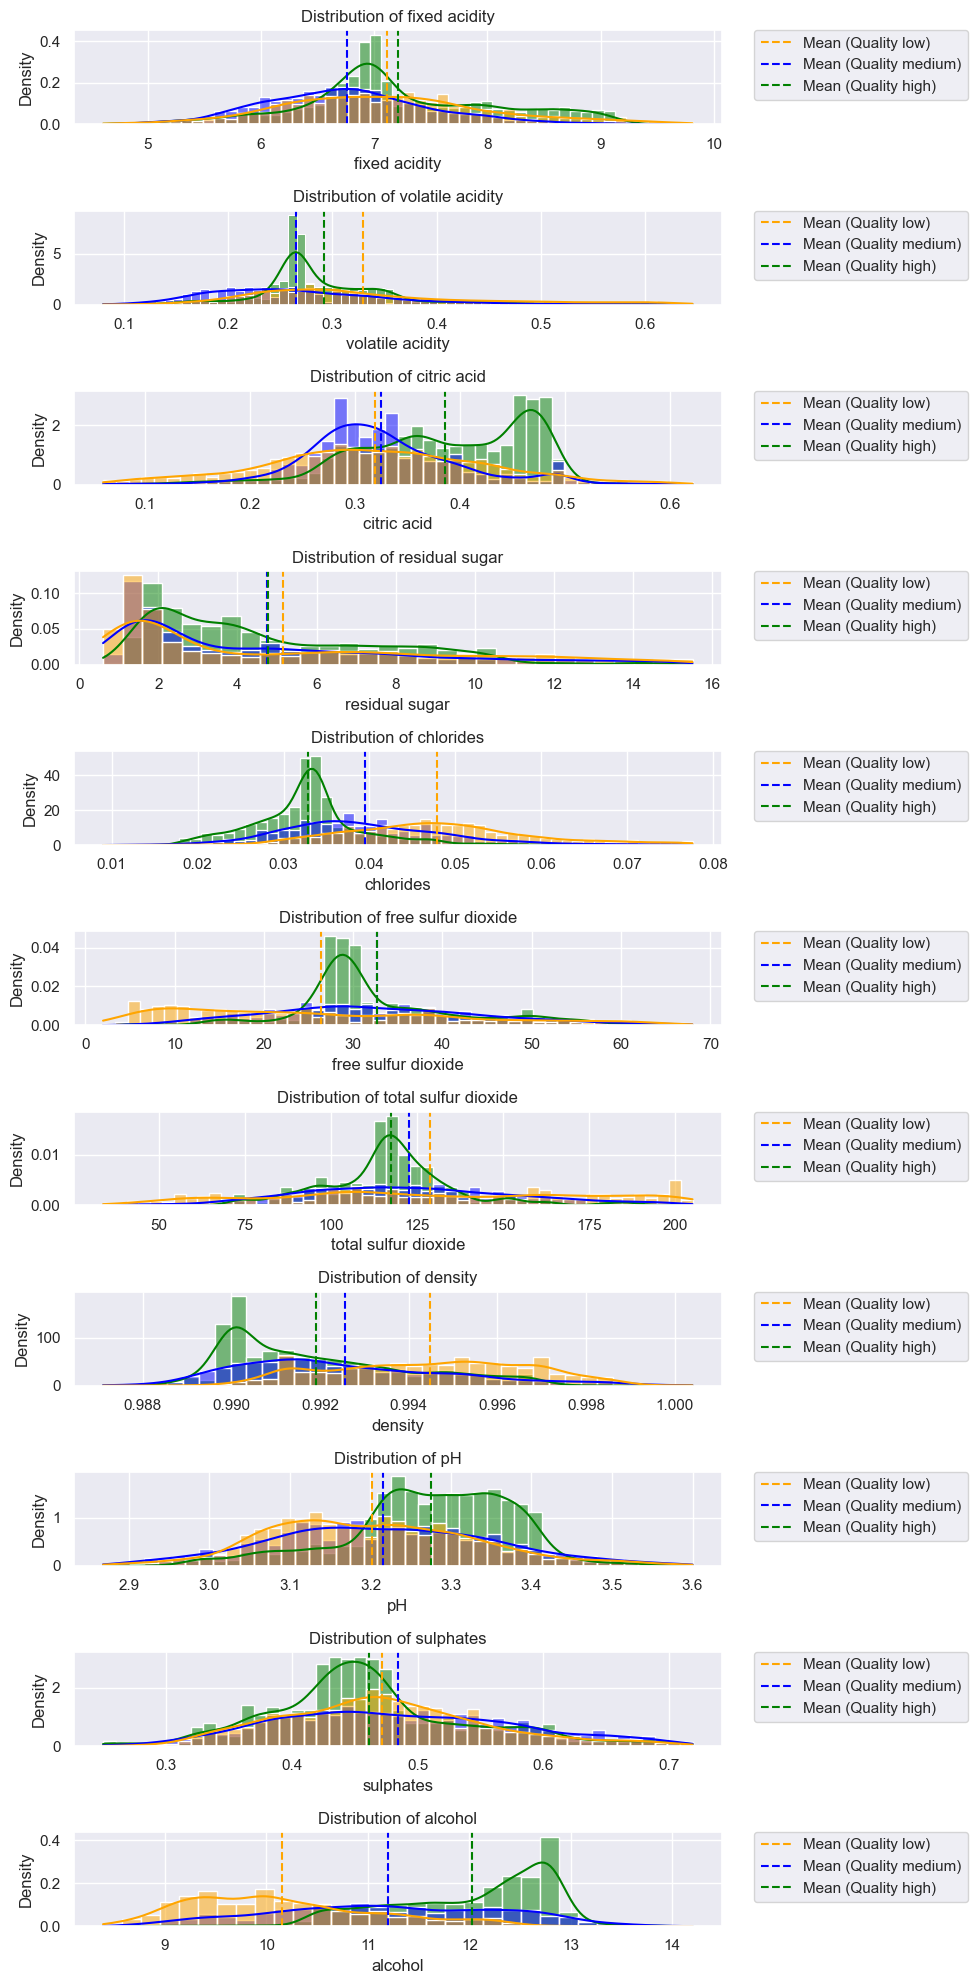

In [15]:
continuous_features = data.drop(['quality', 'wine_type'], axis=1).columns
plt.figure(figsize=(10,20))

for i, feature in enumerate(continuous_features):
    plt.subplot(11, 1, i + 1)

    # Plot the histogram with KDE
    sns.histplot(data, x=feature, hue='quality', palette=['orange', 'Blue', 'green'], kde=True, stat='density', alpha=0.5)
    plt.title(f'Distribution of {feature}')

    # Calculate and plot the mean line for each quality class
    for quality_class in data['quality'].unique():
        mean_value = data[data['quality'] == quality_class][feature].mean()
        plt.axvline(mean_value, color=['orange', 'Blue', 'green'][quality_class], linestyle='--',
                    label=f'Mean (Quality {list(keys)[quality_class]})')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

## Boxplot Analysis

Boxplots give insights into the range and distribution of values in each quality category, as well as potential outliers.

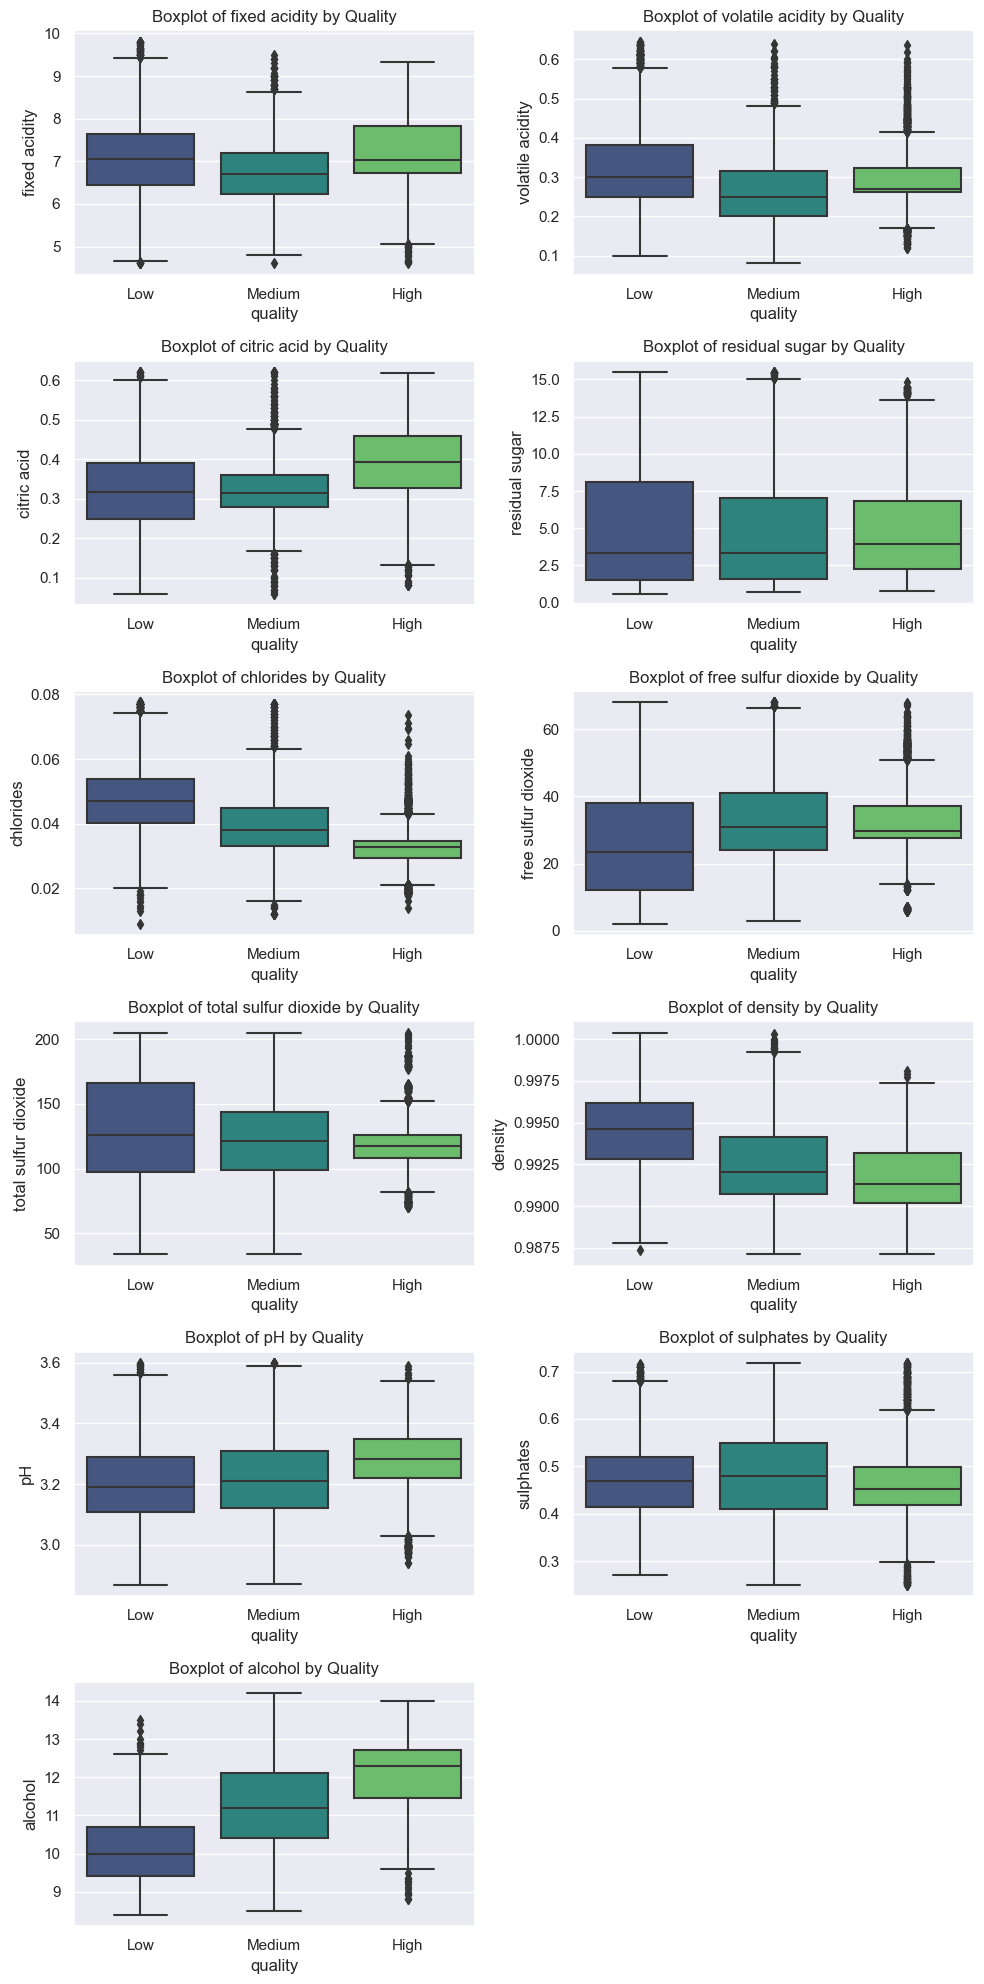

In [16]:
plt.figure(figsize=(10, 20))
for i, feature in enumerate(continuous_features):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(data=data, x='quality', y=feature, palette='viridis')
    plt.title(f'Boxplot of {feature} by Quality')
    plt.xticks([0,1,2],['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()

---
## Pair Plot of Key Features

To understand relationships between **key features** and their distribution across wine quality levels, we use a **pair plot**. This can highlight separability among quality levels and potential feature interactions that influence quality.

<Figure size 2500x2500 with 0 Axes>

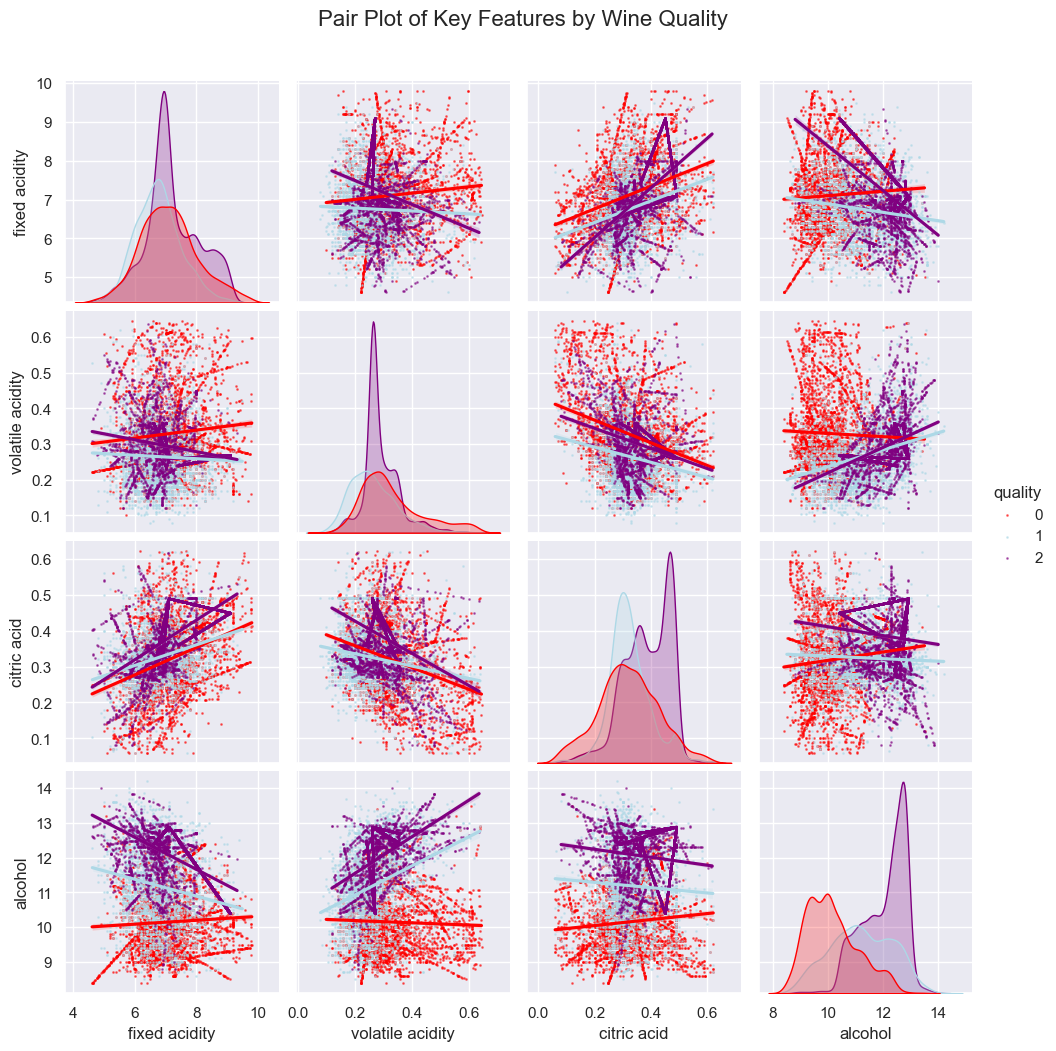

In [17]:
plt.figure(figsize=(25, 25))
pair_plot = sns.pairplot(
    data,
    vars=['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol'],
    kind='reg',
    hue='quality',
    palette=['red', 'lightblue', 'purple'],
    plot_kws={'scatter_kws': {'alpha': 0.5, 's':1}}
)
pair_plot.fig.suptitle('Pair Plot of Key Features by Wine Quality', y=1.05, fontsize=16)
plt.show()

---
## Violin Plot of Feature Distributions by Quality

Here, **violin plots** allow us to examine the distribution shape of each feature for different quality levels. This provides deeper insights into the spread, skewness, and modality of features like `alcohol`, `pH`, and `sulphates`.


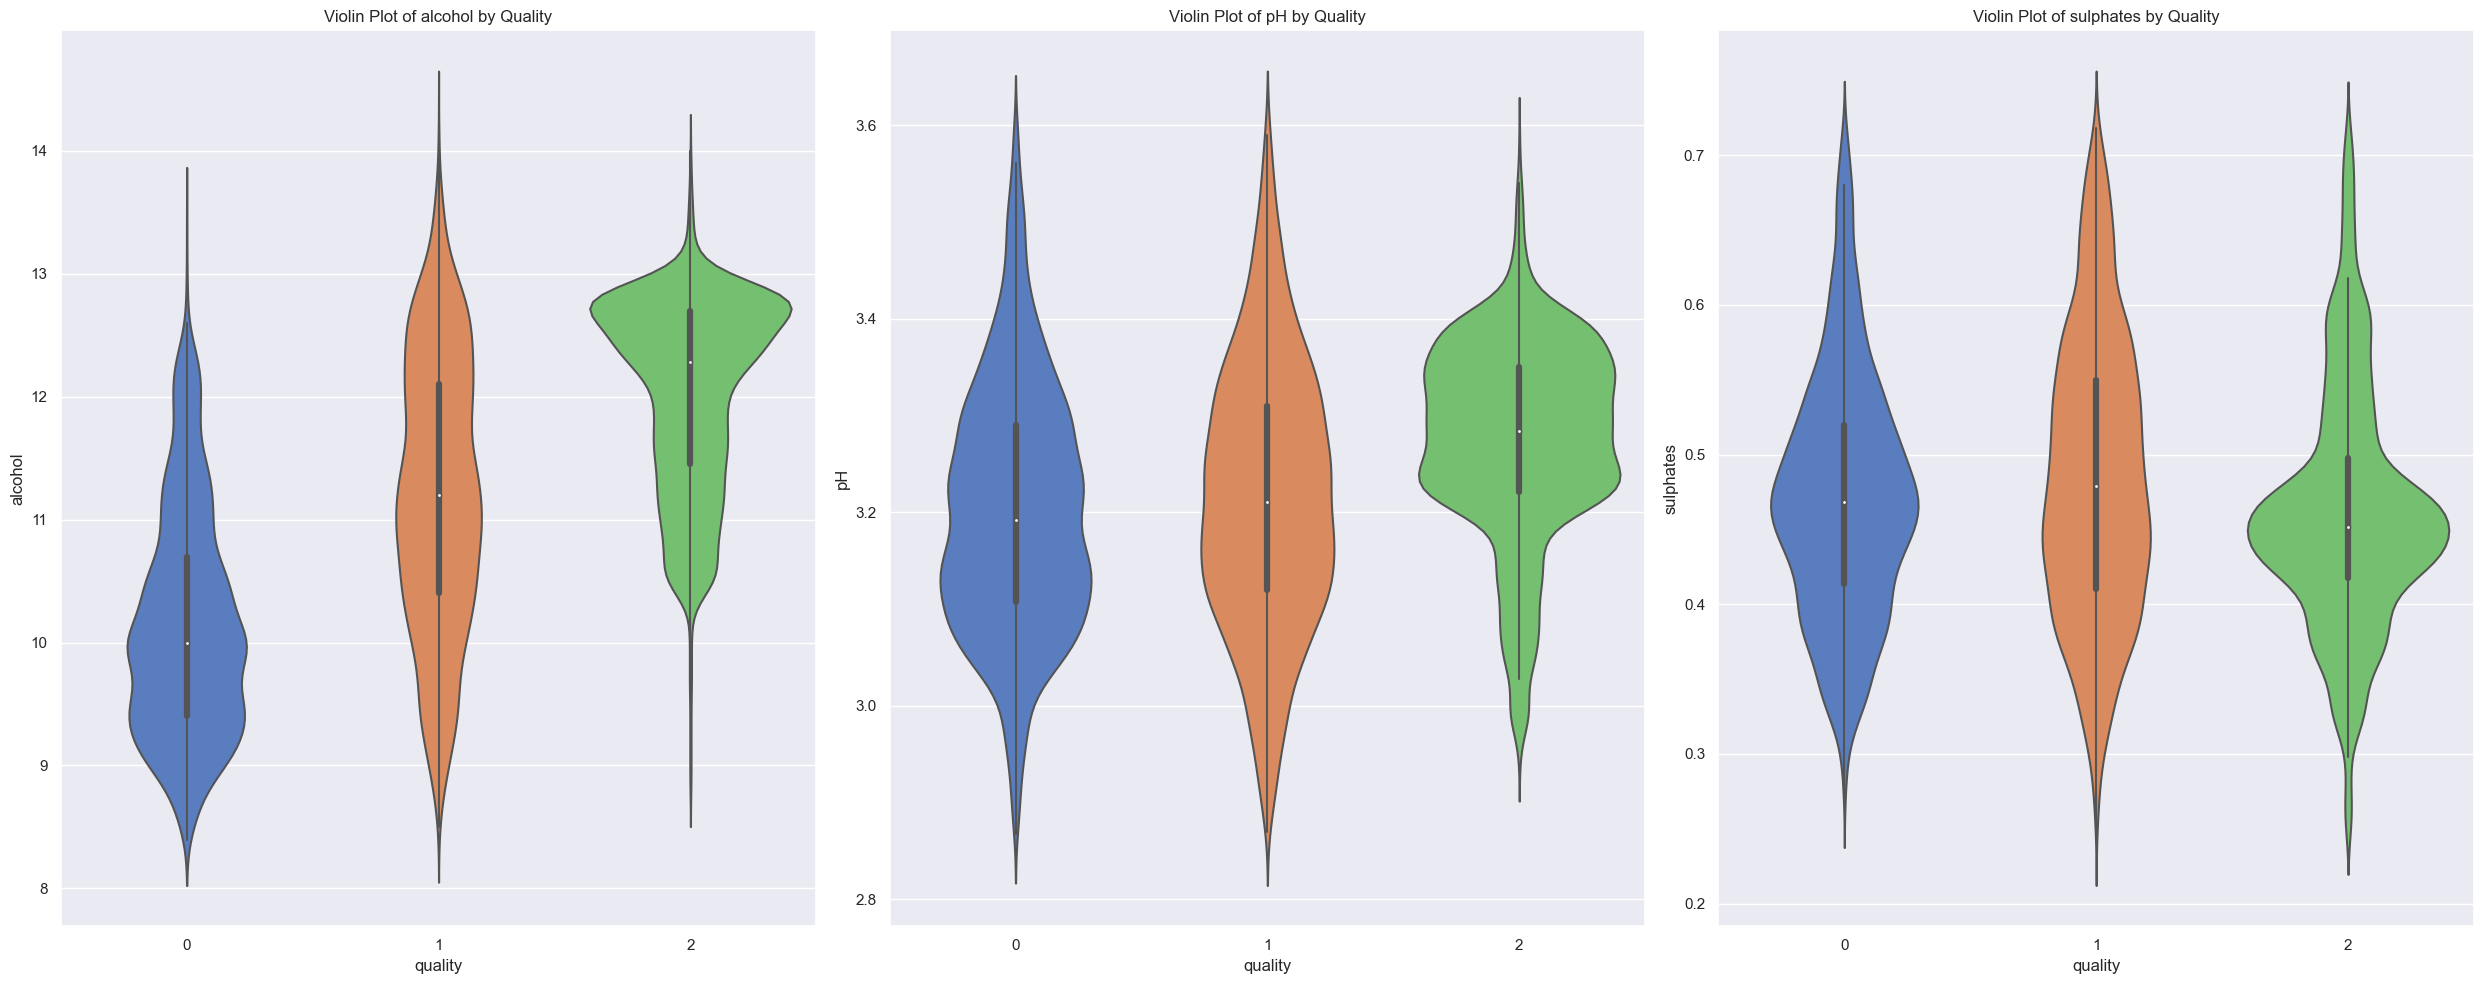

In [18]:
features_to_plot = ['alcohol', 'pH', 'sulphates']
plt.figure(figsize=(25, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(data=data, x='quality', y=feature, palette='muted')
    plt.title(f'Violin Plot of {feature} by Quality')
plt.tight_layout()
plt.show()

---
## Stacked Bar Plot of Wine Type and Quality

To analyze the relationship between **wine type** (red or white) and **quality levels**, this stacked bar plot shows the **breakdown of quality levels** within each wine type. This visualization helps identify trends in quality associated with each wine type.


<Figure size 1000x600 with 0 Axes>

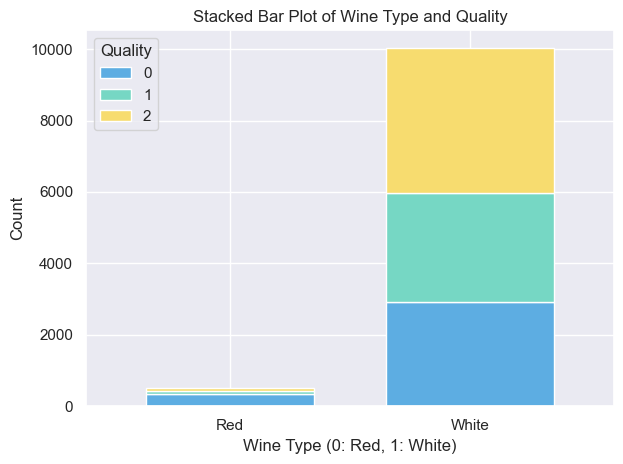

In [19]:
plt.figure(figsize=(10, 6))
wine_quality_counts = data.groupby(['wine_type', 'quality']).size().unstack()
wine_quality_counts.plot(kind='bar', stacked=True, color=['#5DADE2', '#76D7C4', '#F7DC6F'], width=0.7)
plt.title('Stacked Bar Plot of Wine Type and Quality')
plt.xlabel('Wine Type (0: Red, 1: White)')
plt.ylabel('Count')
plt.legend(title='Quality')
plt.xticks(ticks=[0, 1], labels=['Red', 'White'], rotation=0)
plt.tight_layout()
plt.show()

---
## Interaction Plots Between Selected Features

Exploring interactions between pairs of selected features, such as **pH vs. fixed acidity** and **alcohol vs. sulphates**, grouped by wine quality can reveal significant trends. These plots may highlight how certain feature combinations relate to higher or lower quality levels.


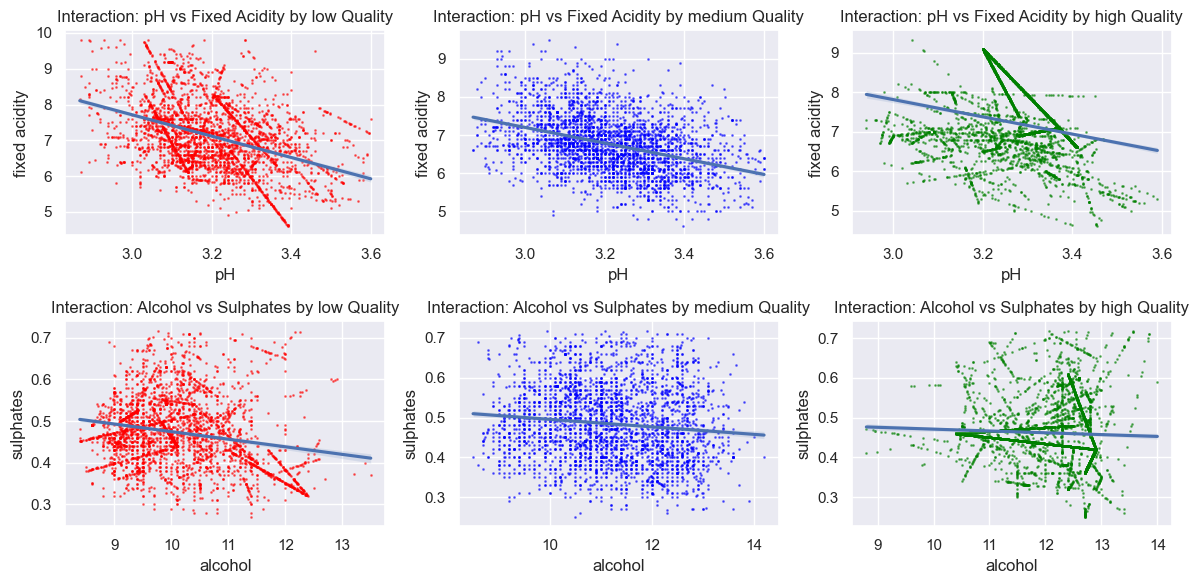

In [20]:
plt.figure(figsize=(12, 6))
color = ['red', 'blue', 'green']
# Interaction between pH and fixed acidity
for i in range(0,3):
    plt.subplot(2, 3, i+1)
    sns.regplot(data=data[data.quality == i], x='pH', y='fixed acidity', scatter_kws={'alpha': 0.5, 's':1, 'color':color[i]})
    plt.title(f'Interaction: pH vs Fixed Acidity by {list(keys)[i]} Quality')

# Interaction between alcohol and sulphates
for i in range(0,3):
    plt.subplot(2, 3, i+3+1)
    sns.regplot(data=data[data.quality == i],x='alcohol', y='sulphates',scatter_kws={'alpha': 0.5, 's':1, 'color':color[i]})
    plt.title(f'Interaction: Alcohol vs Sulphates by {list(keys)[i]} Quality')

plt.tight_layout()
plt.show()

# Standardizing dataset

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,10519.0,7.045197,0.884793,4.606137,6.494731,6.957210,7.588013,9.810610
volatile acidity,10519.0,0.295655,0.090328,0.080000,0.243336,0.275000,0.335837,0.645424
citric acid,10519.0,0.346925,0.094314,0.059717,0.284991,0.341225,0.419134,0.621446
residual sugar,10519.0,4.888098,3.612064,0.600000,1.825372,3.737613,7.277960,15.510743
chlorides,10519.0,0.039488,0.011104,0.009000,0.032188,0.037000,0.046181,0.077584
free sulfur dioxide,10519.0,30.721728,13.135290,2.000000,23.000000,29.374561,38.353622,68.000000
total sulfur dioxide,10519.0,122.510491,33.739569,33.696863,102.000000,118.346886,140.000000,205.033236
density,10519.0,0.992908,0.002473,0.987110,0.990888,0.992540,0.994865,1.000400
pH,10519.0,3.234620,0.126681,2.867949,3.140000,3.240000,3.326743,3.600000
sulphates,10519.0,0.471522,0.085988,0.250000,0.414592,0.460000,0.524295,0.718494


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
non_scaled_cols = data[["wine_type",'quality']]
features = data.drop(['quality', "wine_type"], axis=1)

data = scaler.fit_transform(features)
data = pd.DataFrame(data, columns=features.columns)
data['wine_type'] = non_scaled_cols['wine_type'].to_numpy()
data['quality'] = non_scaled_cols['quality'].to_numpy()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
0,0.966152,3.369494,-3.042371,-0.910353,2.657928,-1.196964,-1.882464,1.412196,0.516124,-0.134006,-1.469248,0,0
1,2.096413,-0.837605,1.411044,-0.854981,3.378437,-0.131083,-1.852823,1.573976,1.226604,0.680099,-1.469248,0,1
2,-0.164110,3.424850,-2.406169,1.609102,3.018183,0.706396,-1.171099,2.585102,1.700257,0.563798,-1.469248,0,1
3,-1.633451,0.158813,0.244673,-0.965726,3.108246,-1.425368,-0.785776,1.007746,0.674008,1.261602,-1.632705,0,0
4,0.853125,3.258781,-1.769967,-0.716549,3.288373,-1.044696,-2.030665,1.857092,1.542373,1.377903,-0.978878,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10514,-0.449830,0.607845,-0.403365,-0.894668,-1.571583,-0.461435,-1.033458,-1.293021,1.354674,1.401865,1.021186,1,2
10515,-0.033272,-0.208221,1.159783,-0.772223,-0.841339,-0.068605,-0.421720,-1.099243,1.121920,-0.226912,1.322396,1,2
10516,0.015826,-0.304408,1.344025,-0.757791,-0.755268,-0.022303,-0.349617,-1.076403,1.094487,-0.418890,1.357898,1,2
10517,1.530803,-0.322812,1.241480,0.766945,-0.498858,-0.127228,-0.070035,0.705856,0.196692,-0.296925,0.063592,1,2


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,10519.0,6.052346e-16,1.000048,-2.756776,-0.622170,-0.099448,0.613525,3.125641
volatile acidity,10519.0,-3.458484e-16,1.000048,-2.387589,-0.579242,-0.228683,0.444863,3.872397
citric acid,10519.0,-2.593863e-16,1.000048,-3.045374,-0.656708,-0.060438,0.765658,2.910848
residual sugar,10519.0,6.653528e-17,1.000048,-1.187216,-0.847956,-0.318527,0.661665,2.941019
chlorides,10519.0,-2.593863e-16,1.000048,-2.745887,-0.657511,-0.224107,0.602782,3.431049
free sulfur dioxide,10519.0,-2.134533e-16,1.000048,-2.186712,-0.587889,-0.102566,0.581050,2.838159
total sulfur dioxide,10519.0,-1.080776e-16,1.000048,-2.632454,-0.607935,-0.123410,0.518393,2.445991
density,10519.0,-8.775902e-15,1.000048,-2.345147,-0.817006,-0.148982,0.791383,3.029998
pH,10519.0,-7.997743e-16,1.000048,-2.894581,-0.746952,0.042470,0.727238,2.884390
sulphates,10519.0,-2.810018e-16,1.000048,-2.576319,-0.662107,-0.134006,0.613754,2.872292


## saving data 

In [24]:
data.to_csv('preprocessed_data.csv', index=False)
# this data is currently imbalance we will balance it in the second phase when we will train the model

---

# Second Phase Of Project


In [25]:
data = pd.read_csv("preprocessed_data.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
0,0.966152,3.369494,-3.042371,-0.910353,2.657928,-1.196964,-1.882464,1.412196,0.516124,-0.134006,-1.469248,0,0
1,2.096413,-0.837605,1.411044,-0.854981,3.378437,-0.131083,-1.852823,1.573976,1.226604,0.680099,-1.469248,0,1
2,-0.164110,3.424850,-2.406169,1.609102,3.018183,0.706396,-1.171099,2.585102,1.700257,0.563798,-1.469248,0,1
3,-1.633451,0.158813,0.244673,-0.965726,3.108246,-1.425368,-0.785776,1.007746,0.674008,1.261602,-1.632705,0,0
4,0.853125,3.258781,-1.769967,-0.716549,3.288373,-1.044696,-2.030665,1.857092,1.542373,1.377903,-0.978878,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10514,-0.449830,0.607845,-0.403365,-0.894668,-1.571583,-0.461435,-1.033458,-1.293021,1.354674,1.401865,1.021186,1,2
10515,-0.033272,-0.208221,1.159783,-0.772223,-0.841339,-0.068605,-0.421720,-1.099243,1.121920,-0.226912,1.322396,1,2
10516,0.015826,-0.304408,1.344025,-0.757791,-0.755268,-0.022303,-0.349617,-1.076403,1.094487,-0.418890,1.357898,1,2
10517,1.530803,-0.322812,1.241480,0.766945,-0.498858,-0.127228,-0.070035,0.705856,0.196692,-0.296925,0.063592,1,2


In [26]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
count,1.051900e+04,1.051900e+04,1.051900e+04,1.051900e+04,1.051900e+04,1.051900e+04,1.051900e+04,1.051900e+04,1.051900e+04,1.051900e+04,1.051900e+04,10519.000000,10519.000000
mean,6.052346e-16,-3.458484e-16,-2.593863e-16,8.308466e-17,-2.593863e-16,-2.188572e-16,-1.080776e-16,-8.775902e-15,-7.997743e-16,-2.918095e-16,-1.945397e-16,0.952752,1.080901
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,0.212179,0.834814
min,-2.756776e+00,-2.387589e+00,-3.045374e+00,-1.187216e+00,-2.745887e+00,-2.186712e+00,-2.632454e+00,-2.345147e+00,-2.894581e+00,-2.576319e+00,-2.294282e+00,0.000000,0.000000
25%,-6.221703e-01,-5.792424e-01,-6.567080e-01,-8.479560e-01,-6.575108e-01,-5.878892e-01,-6.079350e-01,-8.170058e-01,-7.469519e-01,-6.621072e-01,-8.154213e-01,1.000000,0.000000
50%,-9.944845e-02,-2.286828e-01,-6.043779e-02,-3.185268e-01,-2.241065e-01,-1.025658e-01,-1.234101e-01,-1.489819e-01,4.247033e-02,-1.340056e-01,3.921950e-02,1.000000,1.000000
75%,6.135245e-01,4.448633e-01,7.656579e-01,6.616649e-01,6.027820e-01,5.810497e-01,5.183925e-01,7.913830e-01,7.272379e-01,6.137537e-01,9.008741e-01,1.000000,2.000000
max,3.125641e+00,3.872397e+00,2.910848e+00,2.941019e+00,3.431049e+00,2.838159e+00,2.445991e+00,3.029998e+00,2.884390e+00,2.872292e+00,2.453713e+00,1.000000,2.000000


In [27]:
features_name = data.columns[(abs(data.corr()['quality']) > 0) &(data.corr()['quality'] != 1)]
features_name

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type'],
      dtype='object')

Text(0.5, 1.0, 'PCA')

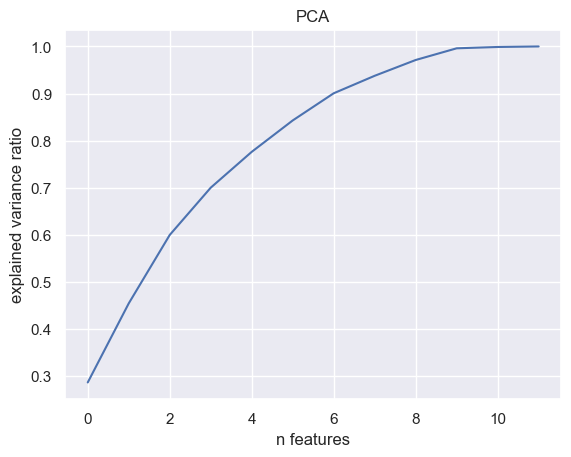

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(features_name))
pca.fit(data[features_name],data['quality'])
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n features")
plt.ylabel("explained variance ratio")
plt.title("PCA")

not going to use pca as 99 variance is shown by 10 components and total are 12 so using all of those components

In [61]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(data[features_name],data['quality'],stratify=data['quality'],test_size=0.2,random_state=1234)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [31]:
# param_grid_forest = {
#     'n_estimators': [100, 500, 1000],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_depth': [10, 20, 30],
#     'bootstrap': [True, False]
# }
# 
# grid_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5, scoring='accuracy', n_jobs=-1,verbose=1)
# grid_forest.fit(x_train, y_train)
# 
# forest_best = grid_forest.best_estimator_
# forest_pred = forest_best.predict(x_test)
# print("Random Forest Best Params:", grid_forest.best_params_)
# print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))

In [32]:
best_params =  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
forest_best = RandomForestClassifier(**best_params)
forest_best.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=500)

In [33]:
forest_pred = forest_best.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))

Random Forest Accuracy: 0.93393536121673


In [34]:
# param_grid_svc = {
#     'kernel': ['linear', 'rbf'],
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.1, 1, 10]
# }
# 
# grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1,verbose=1)
# grid_svc.fit(x_train, y_train)
# 
# svc_best = grid_svc.best_estimator_
# svc_pred = svc_best.predict(x_test)
# print("SVC Best Params:", grid_svc.best_params_)
# print("SVC Accuracy:", accuracy_score(y_test, svc_pred))

In [35]:
best_params = {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
svc_best = SVC(**best_params)
svc_best.fit(x_train,y_train)

SVC(C=10, gamma=1)

In [36]:
svc_pred = svc_best.predict(x_test)
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))

SVC Accuracy: 0.9287072243346007


In [37]:
# param_grid_gb = {
#     'n_estimators': [500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [5, 7],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1],
#     'subsample': [0.6,.8]
# }
# 
# grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_gb.fit(x_train, y_train)
# 
# gb_best = grid_gb.best_estimator_
# gb_pred = gb_best.predict(x_test)
# print("Gradient Boosting Best Params:", grid_gb.best_params_)
# print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

In [38]:
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'subsample': 0.8}
gb_best = GradientBoostingClassifier(**best_params)
gb_best.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=1000, subsample=0.8)

In [39]:
gb_pred = gb_best.predict(x_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Accuracy: 0.9325095057034221


# Neural Networks

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
X = data.drop(columns=['quality'])
y = data['quality']

onehot = OneHotEncoder(sparse=False)
y_encoded = onehot.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1234, stratify=y_encoded)

In [53]:
from keras.optimizers import Adam
from keras import Input, Model
from keras.layers import BatchNormalization, Activation, Add

model = Sequential(
    [
        Dense(128,'relu',input_shape=X_train.iloc[0].shape),
        Dense(64,'relu'),
        Dense(y_train.shape[1],activation='softmax')
    ]
)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [54]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])
history

Epoch 1/500
211/211 - 2s - loss: 0.5917 - accuracy: 0.7400 - val_loss: 0.5564 - val_accuracy: 0.7522 - 2s/epoch - 8ms/step
Epoch 2/500
211/211 - 0s - loss: 0.4904 - accuracy: 0.7833 - val_loss: 0.5042 - val_accuracy: 0.7778 - 391ms/epoch - 2ms/step
Epoch 3/500
211/211 - 0s - loss: 0.4563 - accuracy: 0.8045 - val_loss: 0.4877 - val_accuracy: 0.7885 - 395ms/epoch - 2ms/step
Epoch 4/500
211/211 - 0s - loss: 0.4321 - accuracy: 0.8191 - val_loss: 0.4844 - val_accuracy: 0.7825 - 429ms/epoch - 2ms/step
Epoch 5/500
211/211 - 0s - loss: 0.4108 - accuracy: 0.8329 - val_loss: 0.4562 - val_accuracy: 0.8105 - 428ms/epoch - 2ms/step
Epoch 6/500
211/211 - 0s - loss: 0.3902 - accuracy: 0.8394 - val_loss: 0.4298 - val_accuracy: 0.8271 - 395ms/epoch - 2ms/step
Epoch 7/500
211/211 - 0s - loss: 0.3693 - accuracy: 0.8474 - val_loss: 0.4101 - val_accuracy: 0.8307 - 384ms/epoch - 2ms/step
Epoch 8/500
211/211 - 0s - loss: 0.3545 - accuracy: 0.8532 - val_loss: 0.4042 - val_accuracy: 0.8307 - 370ms/epoch - 2ms/

In [55]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 90.49%


In [64]:
import pandas as pd
from pycaret.classification import setup, compare_models,finalize_model,evaluate_model,predict_model,save_model
# Load your dataset
# Replace 'data' with your DataFrame and ensure the 'quality' column is the target
data = data  # Assume 'data' is already loaded as a pandas DataFrame

# Initialize the PyCaret setup
clf_setup = setup(
    data=data,
    target='quality',        # Replace 'quality' with the actual target column name
    train_size=0.8,          # 80% for training, 20% for testing
    normalize=True,          # Scale features for better performance
    session_id=42,           # Seed for reproducibility
    silent=True,             # Disable interactive prompts
    log_experiment=True,     # Optional: Log results in an MLFlow experiment
    remove_multicollinearity=True, # Removes highly correlated features
    multicollinearity_threshold=0.9, # Threshold for multicollinearity removal
)

# Compare models to find the best one
best_model = compare_models(sort='Accuracy')

# Print the best model details
print("Best Model:", best_model)

# Finalize the model for deployment or testing
final_model = finalize_model(best_model)

# Evaluate the finalized model
evaluate_model(final_model)

# Predict on test data
predictions = predict_model(final_model)

# Save the model
save_model(final_model, 'best_wine_quality_model')

ImportError: cannot import name 'EncodedDecodedLabelsReplaceScoreFunc' from 'pycaret.internal.metrics' (D:\Anaconda_envs\ML\lib\site-packages\pycaret\internal\metrics.py)